# Clustered dotplots

In [1]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

## Get data

In [3]:
err = 0.0000001
dt <- data.table::fread("../../_m/clincial_phenotypes_enrichment_analysis_3brainRegions.tsv") %>% 
    mutate(`-log10(FDR)`= -log10(FDR), `OR Percentile`= OR / (1+OR), 
           `log2(OR)` = log2(OR+err), p.fdr.sig=FDR < 0.05, 
           p.fdr.cat=cut(FDR, breaks=c(1,0.05,0.01,0.005,0), 
                         labels=c("<= 0.005","<= 0.01","<= 0.05","> 0.05"), 
                         include.lowest=TRUE))
y0 <- min(dt$`log2(OR)`)-0.1
y1 <- max(dt$`log2(OR)`)+0.1
dt %>% head(2)

Tissue,Comparison,OR,P-value,FDR,-log10(FDR),OR Percentile,log2(OR),p.fdr.sig,p.fdr.cat
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<fct>
Caudate,BS_Caudate_DEG,2.756170,1.392999e-25,5.432696e-24,23.264985,0.7337713,1.462665,TRUE,<= 0.005
Caudate,BS_DLPFC_DEG,2.349303,4.310847e-03,8.848580e-03,2.053126,0.7014304,1.232233,TRUE,<= 0.01


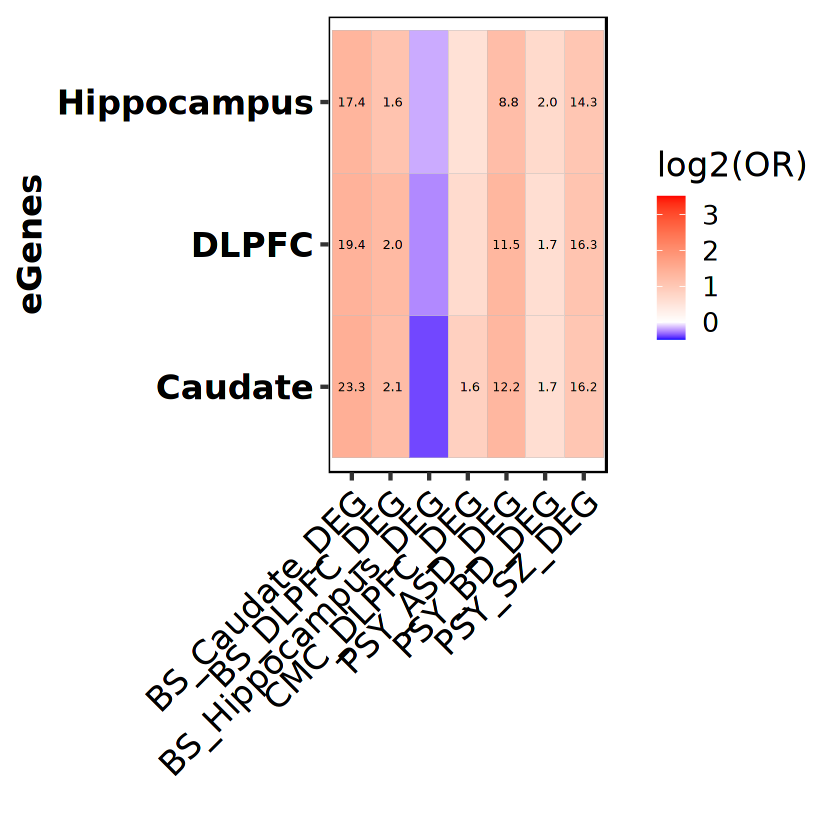

In [4]:
tile_plot <- dt %>% filter(str_detect(Comparison, "DEG")) %>%
    ggplot(aes(x = Comparison, y = Tissue, fill = `log2(OR)`,
               label = ifelse(p.fdr.sig,
                              format(round(`-log10(FDR)`,1), nsmall=1), ""))) +
    ylab('eGenes') + xlab('') + 
    geom_tile(color = "grey") + ggfittext::geom_fit_text(contrast = TRUE) +
    scale_fill_gradientn(colors=c("blue", "white", "red"), 
                        values=scales::rescale(c(y0, 0, y1)),
                        limits=c(y0, y1)) +
    ggpubr::theme_pubr(base_size = 20, border=TRUE) +
    theme(axis.text.x = element_text(angle = 45, hjust=1),
          legend.position="right", 
          axis.title=element_text(face="bold"),
          axis.text.y=element_text(face="bold"))
save_plot(tile_plot, "tileplot_enrichment_deg", 9, 6)
tile_plot

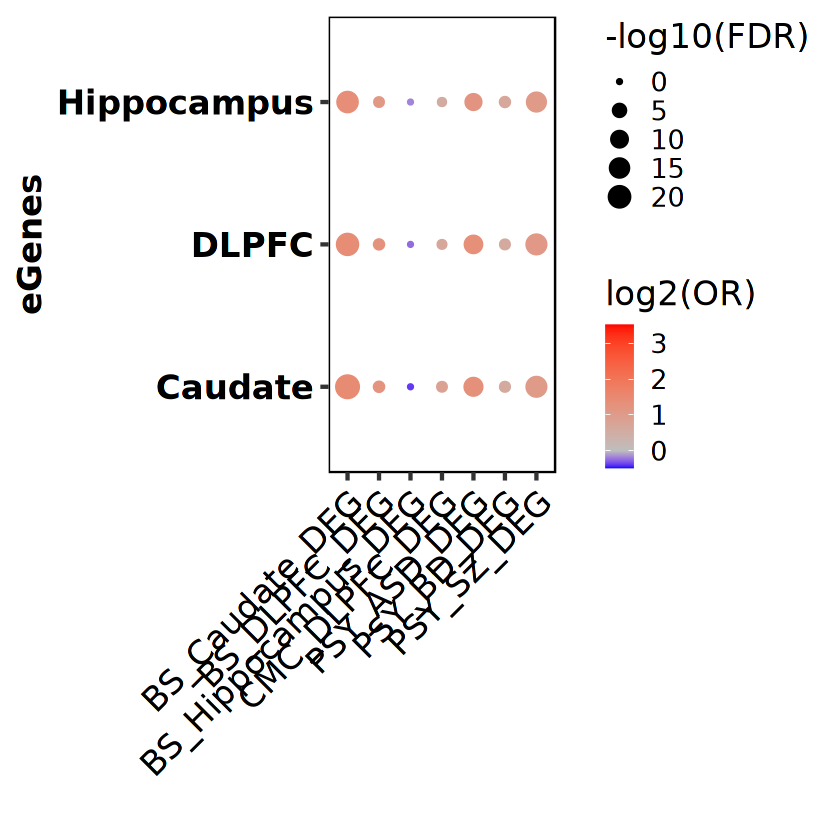

In [5]:
dotplot <- dt %>% filter(str_detect(Comparison, "DEG")) %>%
    ggplot(aes(x=`Comparison`, y=Tissue, color=`log2(OR)`, 
               size=`-log10(FDR)`)) + 
    geom_point() + ylab('eGenes') + xlab('') + 
    scale_color_gradientn(colors=c("blue", "grey", "red"), 
                          values=scales::rescale(c(y0, 0, y1)),
                          limits=c(y0, y1)) +
    ggpubr::theme_pubr(base_size=20, border=TRUE) + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), 
          legend.position="right", 
          axis.title=element_text(face="bold"),
          axis.text.y=element_text(face="bold"))
save_plot(dotplot, "dotplot_enrichment_deg", 10, 7)
dotplot

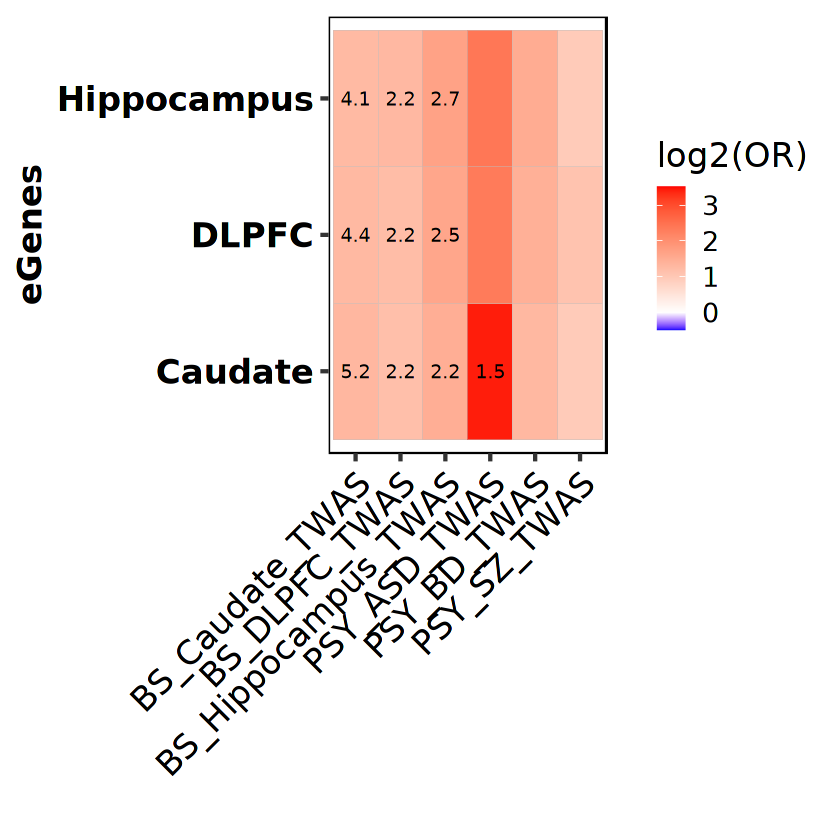

In [6]:
tile_plot <- dt %>% filter(str_detect(Comparison, "TWAS")) %>%
    ggplot(aes(x = Comparison, y = Tissue, fill = `log2(OR)`,
               label = ifelse(p.fdr.sig,
                              format(round(`-log10(FDR)`,1), nsmall=1), ""))) +
    ylab('eGenes') + xlab('') + 
    geom_tile(color = "grey") + ggfittext::geom_fit_text(contrast = TRUE) +
    scale_fill_gradientn(colors=c("blue", "white", "red"), 
                        values=scales::rescale(c(y0, 0, y1)),
                        limits=c(y0, y1)) +
    ggpubr::theme_pubr(base_size = 20, border=TRUE) +
    theme(axis.text.x = element_text(angle = 45, hjust=1),
          legend.position="right", 
          axis.title=element_text(face="bold"),
          axis.text.y=element_text(face="bold"))
save_plot(tile_plot, "tileplot_enrichment_twas", 8, 6)
tile_plot

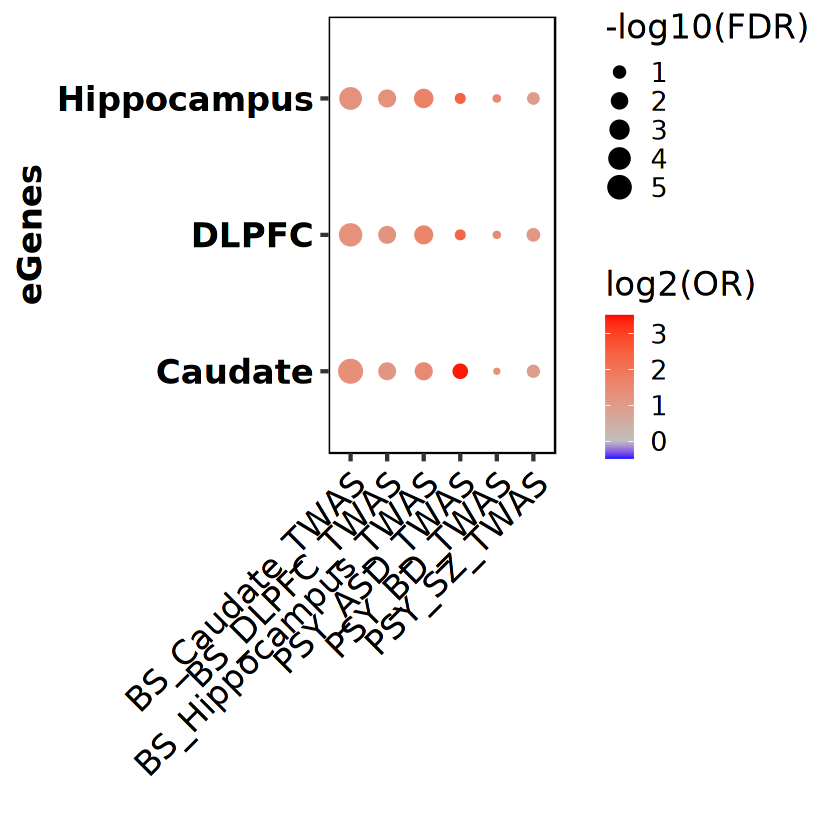

In [7]:
dotplot <- dt %>% filter(str_detect(Comparison, "TWAS")) %>%
    ggplot(aes(x=`Comparison`, y=Tissue, color=`log2(OR)`, 
               size=`-log10(FDR)`)) + 
    geom_point() + ylab('eGenes') + xlab('') + 
    scale_color_gradientn(colors=c("blue", "grey", "red"), 
                          values=scales::rescale(c(y0, 0, y1)),
                          limits=c(y0, y1)) +
    ggpubr::theme_pubr(base_size=20, border=TRUE) + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), 
          legend.position="right",
          axis.title=element_text(face="bold"),
          axis.text.y=element_text(face="bold"))
save_plot(dotplot, "dotplot_enrichment_twas", 9, 7)
dotplot

## Reproducibility Information

In [8]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-10-13 15:26:51 EDT"

   user  system elapsed 
 15.518   0.791  20.392 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-10-13                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 abind         1.4-5    2016-07-21 [1] CRAN (R 4.0.2)
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.9    2021-07-27 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 